# 1. Import Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot
from tqdm.auto import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

training_variables = util.training_variables
columns = util.all_relevant_variables

Welcome to JupyROOT 6.26/14


In [2]:
# 4S Data vs MC

cut = '(5<B0_roeMbc_my_mask) & (-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_200fb_control/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/e_channel/proc13_4S_quaxo_4.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

In [3]:
# # 4S Data vs MC

# cut = '(5<B0_roeMbc_my_mask) & (-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# # Load data files
# MC_4S_far = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_200fb_test/*.root:B0'],
#                           library="np",
#                           cut = cut,
#                           filter_branch=lambda branch: branch.name in columns)

# df_mc_4S_far = pd.DataFrame(MC_4S_far)

In [4]:
lgb_tight = 'sig_prob==largest_prob and sig_prob>0.6 and fakeD_prob<0.05'
ag_tight = 'sig_prob==largest_prob and sig_prob>0.8 and fakeD_prob<0.05'
MVA_all = 'D_M>0'

In [5]:
for df in [df_mc_4S,df_data_4S]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

In [6]:
df_mc_4S_lgb = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_tight, library='lgbm')
df_data_4S_lgb = util.apply_mva_bcs(df_data_4S, training_variables, lgb_tight, library='lgbm')

# df_mc_4S_far_lgb = util.apply_mva_bcs(df_mc_4S_far, training_variables, lgb_tight, library='lgbm')

In [19]:
columns_without_nan = df_data_4S_lgb.columns[~df_data_4S_lgb.isna().any()].tolist()

samples=util.get_dataframe_samples_new(df_mc_4S_lgb, 'e', template=False)
mpl=util.mpl(samples,df_data_4S_lgb)
# df_conti_conti = samples['bkg_continuum']
for name, df in samples.items():
    print(name, len(df))

bkg_fakeD 10322
bkg_TDFl 1420
bkg_fakeTracks 566
bkg_continuum 3160
bkg_combinatorial 3519
bkg_singleBbkg 2194
bkg_other_TDTl 0
$D\tau\nu$ 883
$D^\ast\tau\nu$ 503
$D\ell\nu$ 18762
$D^\ast\ell\nu$ 12132
$D^{\ast\ast}\tau\nu$ 310
$D^{\ast\ast}\ell\nu$_narrow 3797
$D^{\ast\ast}\ell\nu$_broad 2910
$D\ell\nu$_gap_pi 773
$D\ell\nu$_gap_eta 601
bkg_other_signal 0


In [10]:
# columns_without_nan = df_data_4S_lgb.columns[~df_data_4S_lgb.isna().any()].tolist()

# samples_far=util.get_dataframe_samples_new(df_mc_4S_far_lgb, 'e', template=False)
# mpl_far=util.mpl(samples_far,df_mc_4S_lgb)
# # df_conti_conti = samples['bkg_continuum']
# for name, df in samples_far.items():
#     print(name, len(df))

bkg_fakeD 4925
bkg_TDFl 3
bkg_fakeTracks 134
bkg_continuum 21
bkg_combinatorial 17
bkg_singleBbkg 8
bkg_other_TDTl 0
$D\tau\nu$ 4
$D^\ast\tau\nu$ 0
$D\ell\nu$ 72
$D^\ast\ell\nu$ 40
$D^{\ast\ast}\tau\nu$ 0
$D^{\ast\ast}\ell\nu$ 29
$D\ell\nu$_gap 2
bkg_other_signal 0


In [ ]:
# lgbm
tests = np.linspace(0,1,21)
mpl.plot_FOM(sigModes=[r'$D\tau\nu$'],bkgModes=['bkg_FakeD','bkg_TDFl','bkg_fakeTracks',
                                                'bkg_continuum','bkg_combinatorial','bkg_singleBbkg'],
            variable='sig_prob', test_points=tests)

In [ ]:
# lightgbm
tests = np.linspace(0,1,21)
mpl.plot_FOM(sigModes=[r'$D\tau\nu$'],bkgModes=['bkg_FakeD','bkg_TDFl','bkg_fakeTracks',
                                                'bkg_continuum','bkg_combinatorial','bkg_singleBbkg'],
            variable='fakeD_prob', test_points=tests, cut='sig_prob>0.6',reverse=True)

In [ ]:
# ag-20241201_220240
tests = np.linspace(0,1,21)
mpl.plot_FOM(sigModes=[r'$D\tau\nu$'],bkgModes=['bkg_FakeD','bkg_TDFl','bkg_fakeTracks',
                                                'bkg_continuum','bkg_combinatorial','bkg_singleBbkg'],
            variable='sig_prob', test_points=tests)

In [ ]:
# ag-20241203_064801
tests = np.linspace(0,1,21)
mpl.plot_FOM(sigModes=[r'$D\tau\nu$'],bkgModes=['bkg_FakeD','bkg_TDFl','bkg_fakeTracks',
                                                'bkg_continuum','bkg_combinatorial','bkg_singleBbkg'],
            variable='fakeD_prob', test_points=tests, cut='sig_prob>0.8',reverse=True)

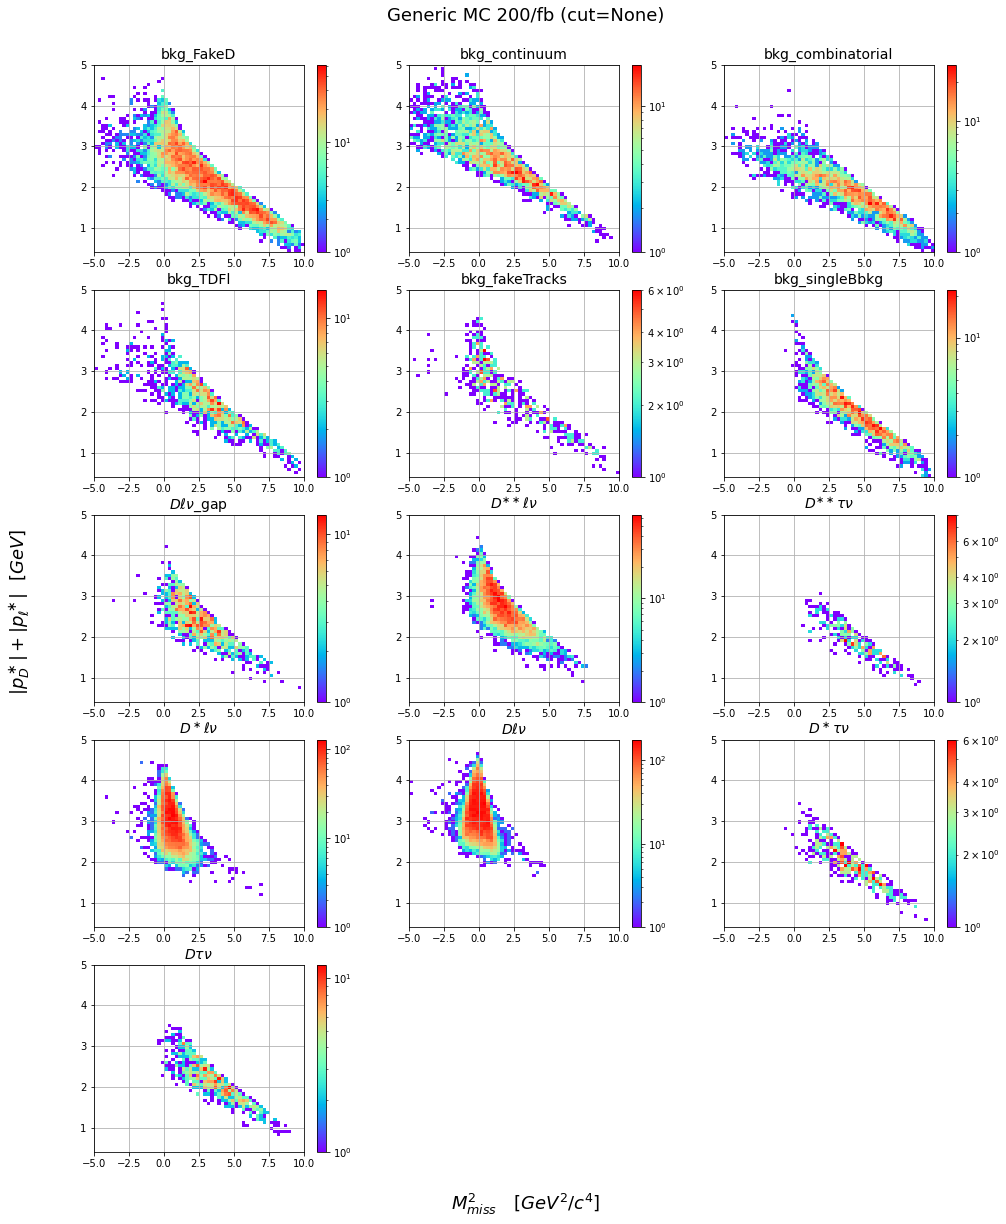

In [15]:
# Define the fitting range and number of bins, 'p_D_l'
start = 0.4
end = 5
num_bins = 60

# Create the bin edges
p_D_l_bins = np.linspace(start, end, num_bins + 1)

# Define the fitting range and number of bins, 'B0_CMS3_weMissM2'
start = -5
end = 10
num_bins = 60

# Create the bin edges
MM2_bins = np.linspace(start, end, num_bins + 1)

mpl.plot_all_2Dhist(bin_list=[MM2_bins,p_D_l_bins], mask=None)

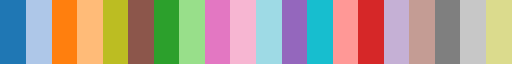

In [10]:
util.my_cmap

# SIG distribution at M_D signal region

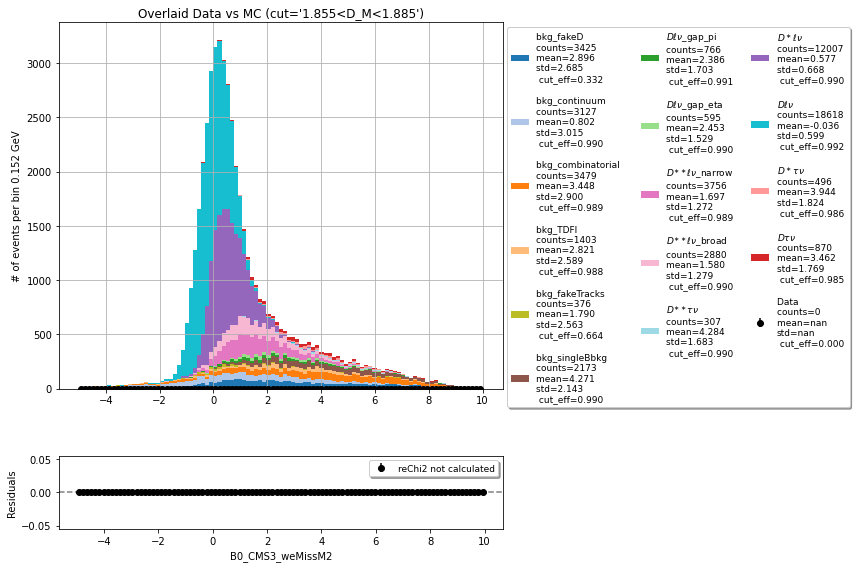

In [13]:
b1 = np.linspace(-5,10,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS3_weMissM2',bins=b1,cut='1.855<D_M<1.885',scale=[1,187/200],density=False,
    correction=False,mask=[],figsize=(12,8),ratio=False,data_sig_mask=True,
                                legend_nc=3, legend_fs=9)

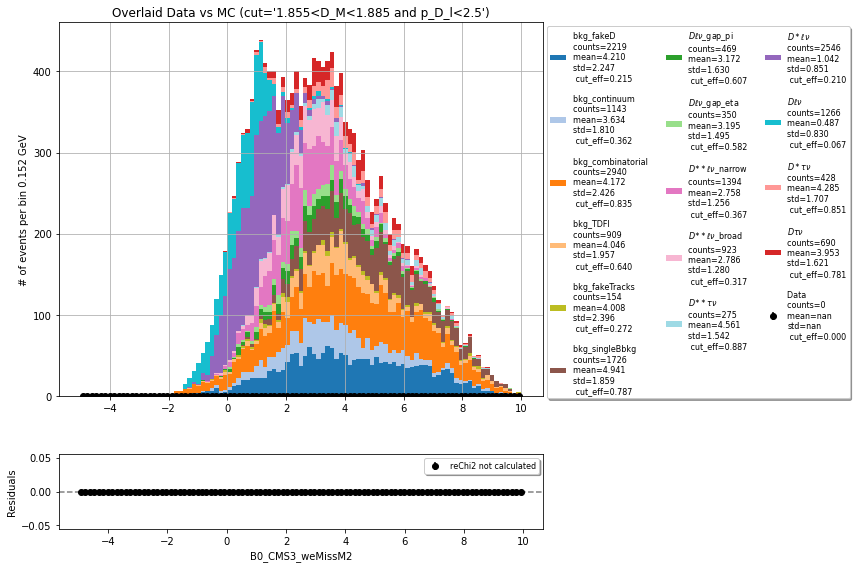

In [14]:
b1 = np.linspace(-5,10,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS3_weMissM2',bins=b1,cut='1.855<D_M<1.885 and p_D_l<2.5',scale=[1,187/200],density=False,
    correction=False,mask=[],figsize=(12,8),ratio=False,data_sig_mask=True,
                                legend_nc=3, legend_fs=8)

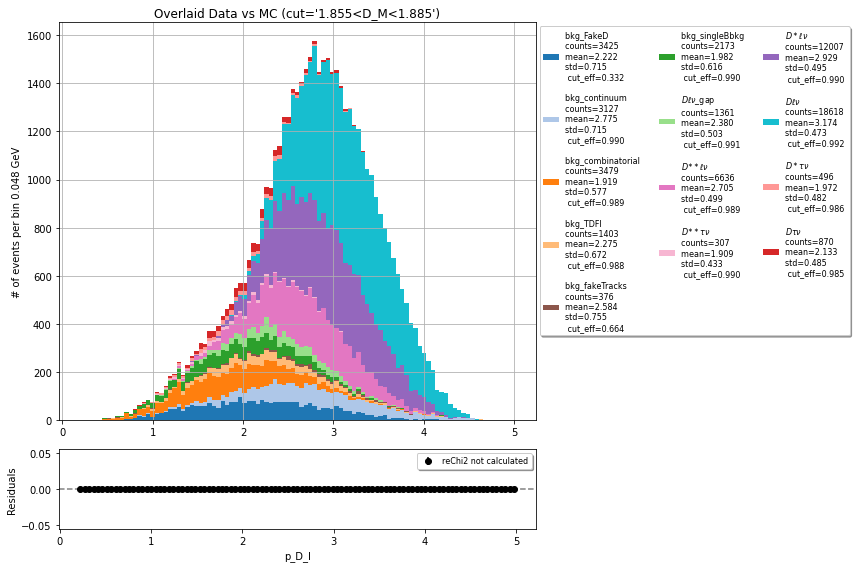

In [23]:
b1 = np.linspace(0.2,5,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='p_D_l',bins=b1,cut='1.855<D_M<1.885',scale=[1,187/200],density=False,
    correction=False,mask=[],figsize=(12,8),ratio=False,data_sig_mask=True,
                                legend_nc=3, legend_fs=8)

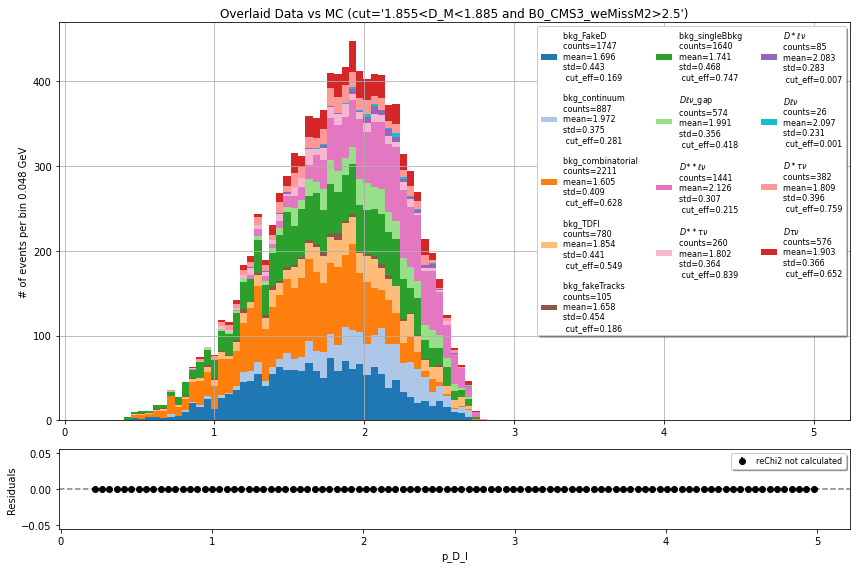

In [24]:
b1 = np.linspace(0.2,5,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='p_D_l',bins=b1,cut='1.855<D_M<1.885 and B0_CMS3_weMissM2>2.5',scale=[1,187/200],density=False,
    correction=False,mask=[],figsize=(12,8),ratio=False,data_sig_mask=True,
                                legend_nc=3, legend_fs=8)

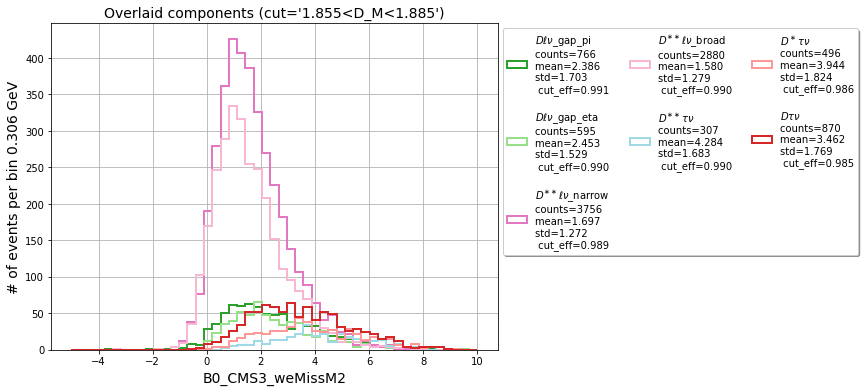

In [21]:
b1 = np.linspace(-5,10,50)
mpl.plot_mc_1d_overlaid(variable='B0_CMS3_weMissM2',bins=b1,mask=[],
                        cut='1.855<D_M<1.885',
                        show_only='sig',density=False)

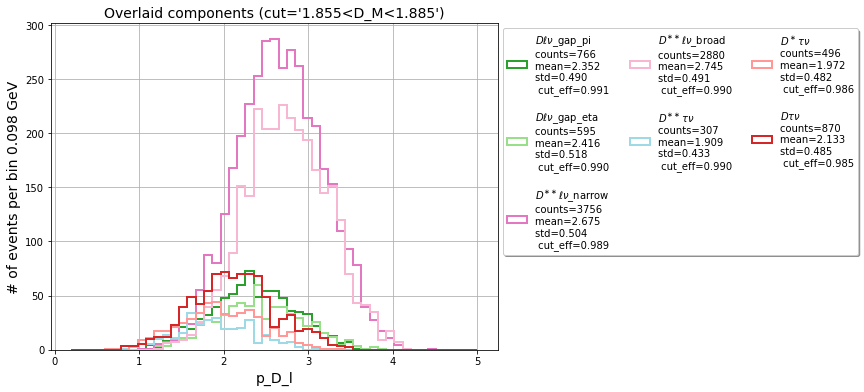

In [22]:
b1 = np.linspace(0.2,5,50)
mpl.plot_mc_1d_overlaid(variable='p_D_l',bins=b1,mask=[],
                        cut='1.855<D_M<1.885',
                        show_only='sig',density=False)

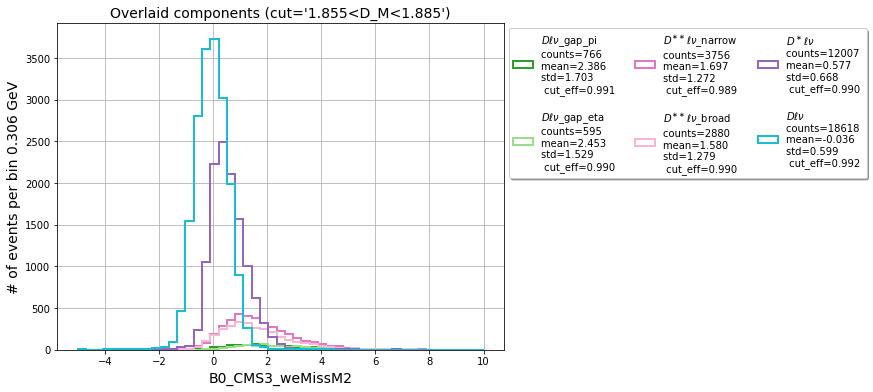

In [23]:
b1 = np.linspace(-5,10,50)
mpl.plot_mc_1d_overlaid(variable='B0_CMS3_weMissM2',bins=b1,
                        cut='1.855<D_M<1.885',mask=[],
                        show_only='norm',density=False)

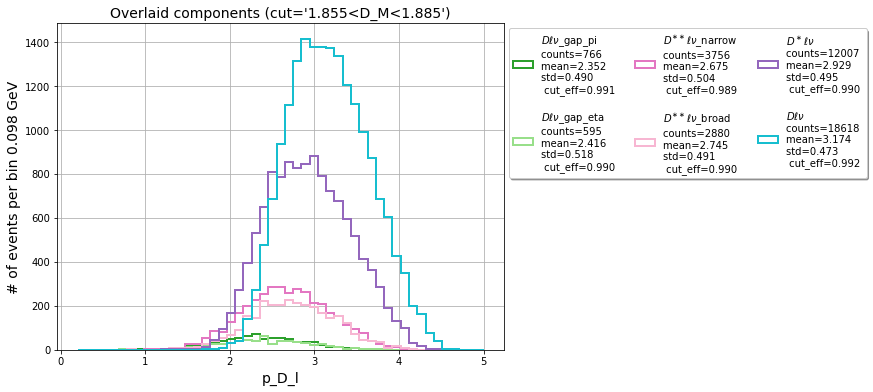

In [24]:
b1 = np.linspace(0.2,5,50)
mpl.plot_mc_1d_overlaid(variable='p_D_l',bins=b1,cut='1.855<D_M<1.885',mask=[],
                        show_only='norm',density=False)

# BKG distribution at M_D sidebands, Data vs. MC

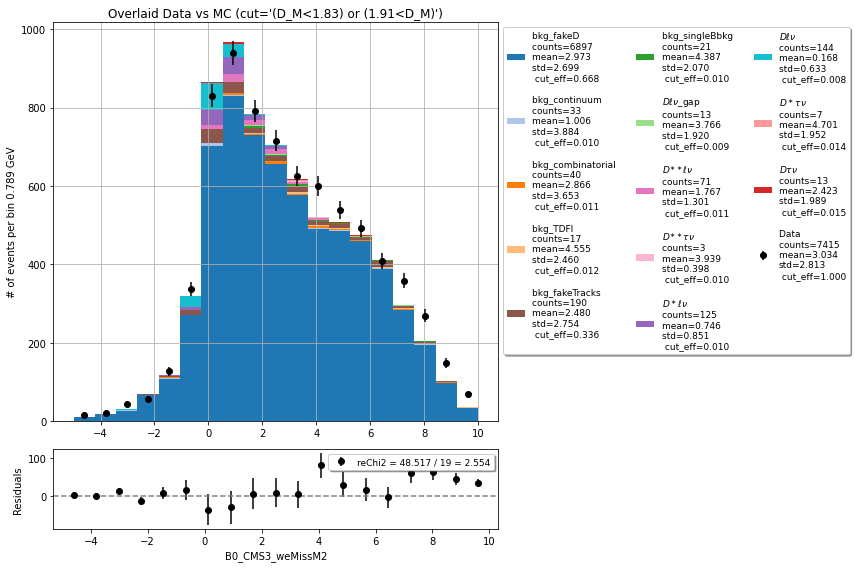

In [36]:
b1 = np.linspace(-5,10,20)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS3_weMissM2',bins=b1,cut='(D_M<1.83) or (1.91<D_M)',scale=[1,187/200],density=False,
    correction=False,mask=[],figsize=(12,8),ratio=False,data_sig_mask=True,
                                legend_nc=3, legend_fs=9)

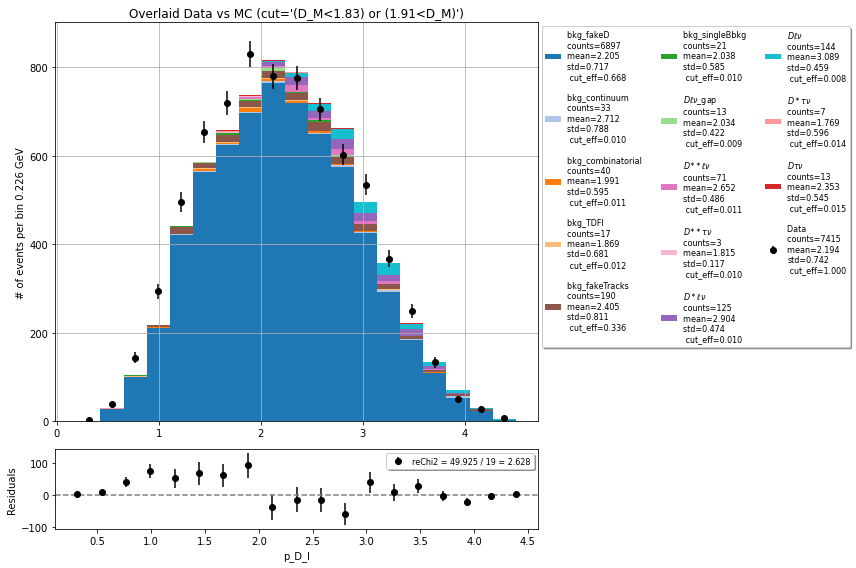

In [41]:
b1 = np.linspace(0.2,4.5,20)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='p_D_l',bins=b1,cut='(D_M<1.83) or (1.91<D_M)',scale=[1,187/200],density=False,
    correction=False,mask=[],figsize=(12,8),ratio=False,data_sig_mask=True,
                                legend_nc=3, legend_fs=8)

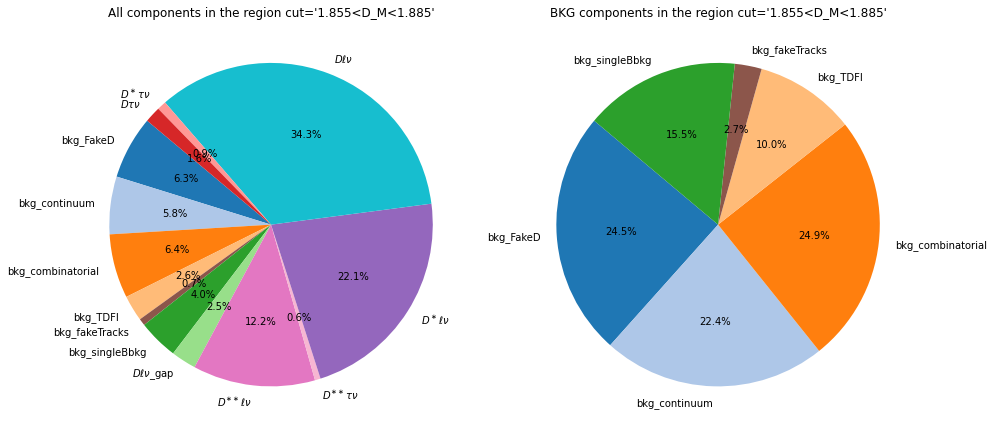

In [29]:
mpl.plot_pie()

# Create data driven template for FakeD
## 1. Calculate the sidebands to sig region scaling factors
### a. Histogram the D_M distribution

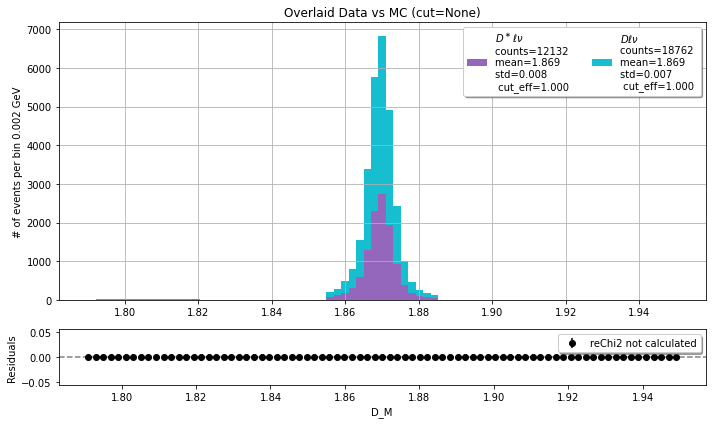

In [11]:
b1 = np.linspace(1.79,1.95,80)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut=None,
    scale=[1,187/200],correction=False,data_sig_mask=True,
    figsize=(10,6),ratio=False,legend_fs=10,legend_nc=3,
    mask=['bkg_fakeD',
        'bkg_TDFl',
        'bkg_fakeTracks',
        'bkg_continuum',
        'bkg_combinatorial',
        'bkg_singleBbkg',
        r'$D\tau\nu$',
        r'$D^\ast\tau\nu$',
#         r'$D\ell\nu$',
#         r'$D^\ast\ell\nu$',
        r'$D^{\ast\ast}\tau\nu$',
        r'$D^{\ast\ast}\ell\nu$',
        r'$D\ell\nu$_gap'],)

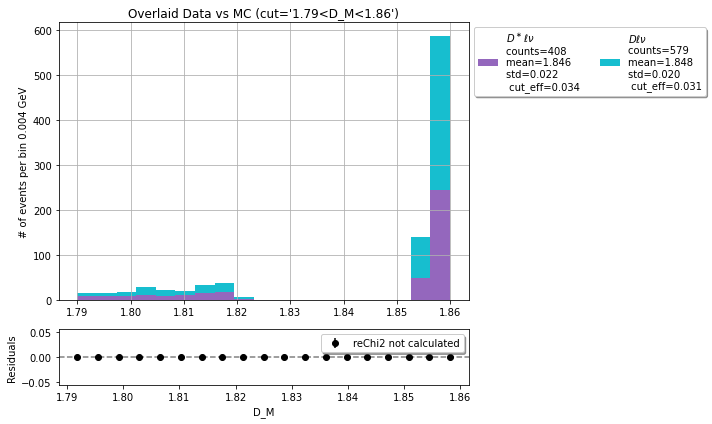

In [26]:
b1 = np.linspace(1.79,1.86,20)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='1.79<D_M<1.86',
    scale=[1,187/200],correction=False,data_sig_mask=True,
    figsize=(10,6),ratio=False,legend_fs=10,legend_nc=3,
    mask=['bkg_fakeD',
        'bkg_TDFl',
        'bkg_fakeTracks',
        'bkg_continuum',
        'bkg_combinatorial',
        'bkg_singleBbkg',
        r'$D\tau\nu$',
        r'$D^\ast\tau\nu$',
#         r'$D\ell\nu$',
#         r'$D^\ast\ell\nu$',
        r'$D^{\ast\ast}\tau\nu$',
        r'$D^{\ast\ast}\ell\nu$',
        r'$D\ell\nu$_gap'],)

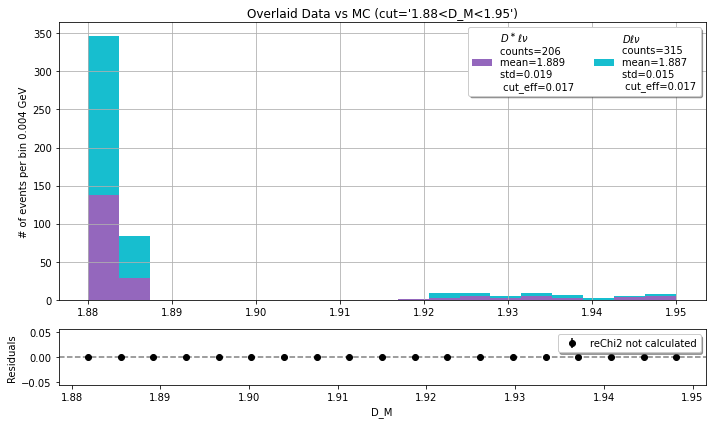

In [27]:
b1 = np.linspace(1.88,1.95,20)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='1.88<D_M<1.95',
    scale=[1,187/200],correction=False,data_sig_mask=True,
    figsize=(10,6),ratio=False,legend_fs=10,legend_nc=3,
    mask=['bkg_fakeD',
        'bkg_TDFl',
        'bkg_fakeTracks',
        'bkg_continuum',
        'bkg_combinatorial',
        'bkg_singleBbkg',
        r'$D\tau\nu$',
        r'$D^\ast\tau\nu$',
#         r'$D\ell\nu$',
#         r'$D^\ast\ell\nu$',
        r'$D^{\ast\ast}\tau\nu$',
        r'$D^{\ast\ast}\ell\nu$',
        r'$D\ell\nu$_gap'],)

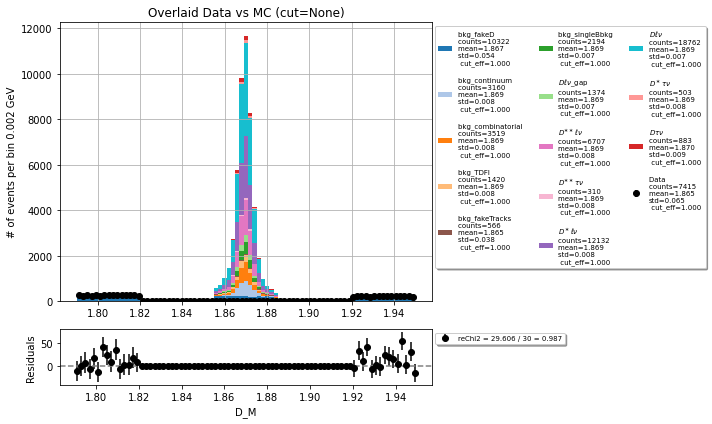

In [8]:
b1 = np.linspace(1.79,1.95,80)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(variable='D_M',bins=b1,cut=None,
                                                      scale=[1,187/200],correction=False,
                                                      data_sig_mask=True,
                                                      mask=[],figsize=(10,6),ratio=False,
                                                      legend_fs=7,legend_nc=3)

### b. fit the FakeD with a polynomial

In [9]:
fitter = util.fit_iminuit(x_edges=b1, hist=mc_hist_all, poly_only=True)

In [40]:
m_ls, c_ls, result_ls = fitter.fit_gauss_poly_LS(deg=1, loss='linear') #'soft_l1'
m_ls
# fitter.plot_poly(x=bin_edges_sb, y=data_hist_sb, yerr=data_err_sb,result=result)

initial parameters= [ 1.1600e+01  1.8700e+00  2.0000e-02 -4.2930e+02  1.5353e+03]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.17 (chi2/ndof = 1.1)    │              Nfcn = 67               │
│ EDM = 4.88e-14 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   0.00    │   0.12    │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  20.0e-3  │  0.2e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │   -360    │    40     │            │            │         │         │       │
│ 4 │ x4   │    920    │    80     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4 │
├────┼───────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0 │
│ x1 │         0         0         0         0         0 │
│ x2 │         0         0         0         0         0 │
│ x3 │         0         0         0  1.77e+03 -3.32e+03 │
│ x4 │         0         0         0 -3.32e+03  6.24e+03 │
└────┴───────────────────────────────────────────────────┘

In [10]:
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml
# fitter.plot_poly(x=bin_edges_sb, y=data_hist_sb, yerr=data_err_sb,result=result)

initial parameters= [ 5.78320e+03  1.87000e+00  2.00000e-02  5.78316e+04 -4.29300e+02
  1.53440e+03]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 24.76 (chi2/ndof = 1.0)    │              Nfcn = 145              │
│ EDM = 2.17e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │     0     │    60     │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  20.0e-3  │  0.2e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  18.84e3  │  0.23e3   │            │            │         │         │       │
│ 4 │ x4   │  -0.7e3   │   0.4e3   │            │            │         │         │       │
│ 5 │ x5   │   1.8e3   │   1.0e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  5.31e+04    0.0305   -0.0756 │
│ x4 │         0         0         0    0.0305  1.61e+05 -4.08e+05 │
│ x5 │         0         0         0   -0.0756 -4.08e+05  1.04e+06 │
└────┴─────────────────────────────────────────────────────────────┘

### c. Calculate the yield ratio

In [38]:
# fit poly + guass
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)
print(yields_sig/yields_left, yields_sig/yields_right)

Yields from 1.79 to 1.82: 4379.667
Yields from 1.855 to 1.885: 3986.036
Yields from 1.92 to 1.95: 3592.405
0.9101230755671607 1.109573113276482


In [11]:
# fit poly only
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)
print(yields_sig/yields_left, yields_sig/yields_right)

Yields from 1.79 to 1.82: 3870.918
Yields from 1.855 to 1.885: 3531.67
Yields from 1.92 to 1.95: 3192.421
0.9123598071568553 1.1062669992460268


In [11]:
a = len(samples['bkg_fakeD'].query('1.79<D_M<1.82')) #* 187/200
b = len(samples['bkg_fakeD'].query('1.92<D_M<1.95')) #* 187/200
c = len(samples['bkg_fakeD'].query('1.855<D_M<1.885'))
print('truth of fakeD in sideband:',a,c,b, c/a, c/b)

truth of fakeD in sideband: 3658 3425 3239 0.9363039912520503 1.0574251312133374


In [15]:
0.9363039912520503/0.9123598071568553

1.026244233807067

In [13]:
1.0574251312133374/1.1062669992460268

0.9558498372761933

### d. Plot and compare MC of the weighted sideband and signal region

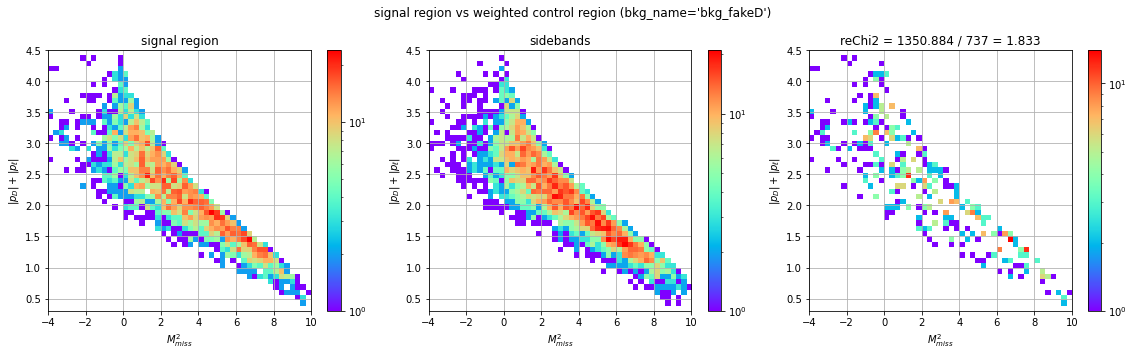

In [16]:
# calculating the scaling factors from mc
b1 = np.linspace(-4,10,50)
b2 = np.linspace(0.3,4.5,50)
scale = {'left sideband': yields_sig/yields_left/2,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2}
mpl.plot_mc_sig_control(variable=['B0_CMS3_weMissM2','p_D_l'],
                        bins=[b1,b2],
                        bkg_name='bkg_fakeD',cut=None,merge_sidebands=True,
                        scale=scale,correction=False,mask=[],figsize=(16,5))

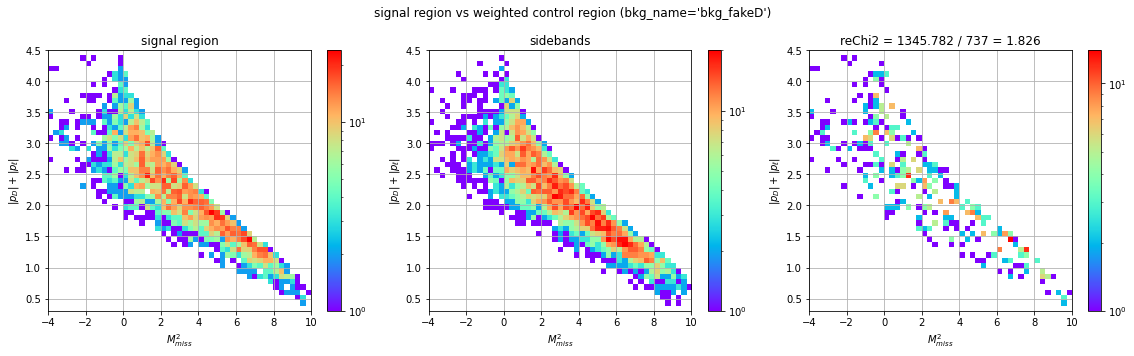

In [17]:
# calculating the scaling factors from mc
b1 = np.linspace(-4,10,50)
b2 = np.linspace(0.3,4.5,50)
scale = {'left sideband': yields_sig/yields_left/2*1.026244233807067,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2*0.9558498372761933}
mpl.plot_mc_sig_control(variable=['B0_CMS3_weMissM2','p_D_l'],
                        bins=[b1,b2],
                        bkg_name='bkg_fakeD',cut=None,merge_sidebands=True,
                        scale=scale,correction=False,mask=[],figsize=(16,5))

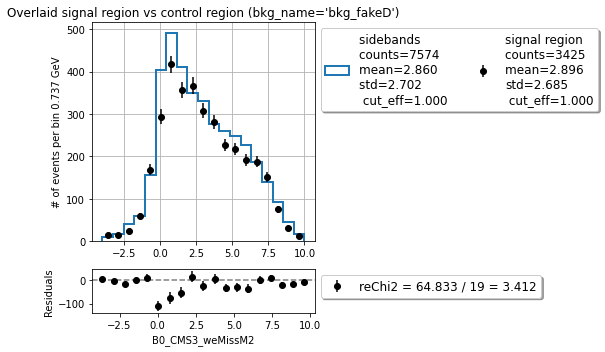

In [43]:
# calculating the scaling factors from mc
b1 = np.linspace(-4,10,20)
scale = {'left sideband': yields_sig/yields_left/2,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_fakeD',cut=None,merge_sidebands=True,
                        scale=scale,correction=False,mask=[])

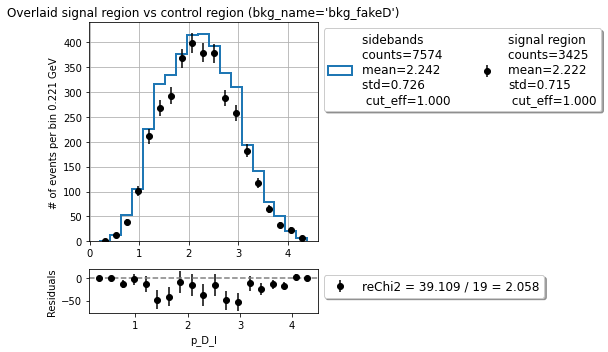

In [44]:
# showing the scaled sidebands vs. sig region from mc
b2 = np.linspace(0.2,4.4,20)
scale = {'left sideband': yields_sig/yields_left/2,
         'signal region': 1,
         'right sideband': yields_sig/yields_right/2}
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,merge_sidebands=True,
                        bkg_name='bkg_fakeD',cut=None,
                        scale=scale,correction=False,mask=[])